# E-Commerce Customer Behavior & Sales Analysis 
Using a dataset with **Public Domain License** from [kaggle](https://www.kaggle.com/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr/data) the goal is complete the steps of a datascience project. The project will be divided into parts reflecting this in diffrent stages, starting with setting up the environment. The lifecycel of a DS project starts with  [**Defining the goal**](#defining-the-goal), using the e-commerce dataset the goal will align with the perspective of the store owner(*Sponsor*) to maximize profit. With a goal in mind the next step is [**Collect and manage data**](#collect-and-manage-data)    

## steps
1. [Create environment](#create-environment)
2. [Import libarys](#import)
3. [import dataset](#load-dataset)
4. [Visualize dataset](#first-visulasation-overview-of-data)
5. [Clean dataset]()
6. []

# Create environment
1. python -m venv venv in terminal 
2. activate venv\Scripts\activate in terminal
3. pip install pandas matplotlib seaborn jupyter plotly sci-learn in terminal
4. python -m ipykernel install --user --name=venv in terminal to use environment
5. choose venv in this file for the correct environment

# Defining the goal
- The goal is to analyze the data and group the customers into groups based on their shopping patterns
- Do the diffrent groups shopping patterns differ
- What causes customers to return to the store?
- Can we increase the sales based on the above statments

Hypothesis:
The transaction order *total amount* is based on the numeric *quantity*, *unit price* and *discount amount*. But also the demographic factors *age*, *gender*, *city* , *payment method* and *device type*.

Discounts increase sales but total revenue per order decreases, customer only buys the discounted item



Price elasticty is diffrent based on the product catergory and discount

Discounts will fetch new customers, but returning customers are more willing to pay full price.
## Measure the success of implematation


# Import

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import plotly.express as px


# Load Dataset

In [77]:
df = pd.read_csv('ecommerce_customer_behavior_dataset.csv')
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


# Collect and manage data

Avaliable Data is 18 columns containging data about the transaction.
The data contains information about the customer:
- Order_ID
- Customer_ID
- Age
- Gender
- City

Information about the customers transaction: 
- Date
- Product_Category
- Unit_Price
- Quantity
- Discount_Amount
- Total_Amount

How the transaction was performed:
- Payment_Method
- Device_Type
- Session_Duration_Minutes
- Pages_Viewed

And the experience after the transaction was completed:
- Is_Returning_Customer
- Delivery_Time_Days
- Customer_Rating

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [79]:
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


# Collect and manage data cont...

The ``info`` Method gives the number of entries: **5000** aswell as the number of *non-null* values **5000**.

For the ``describe`` method, the *age* column ranges between *18-75* with the average age of *35*. The other columns have reasonble values assosiated with them as well. However it is not certian they make sense together, it cant be known if one customer viewed 24 pages in 1 minute for example.

To make sure we dont get  *Garbage in,garbage out* even with 0 null-values,we need to make sure data is relevant a visualization of the data is performed to make sure there are no artifacts or data errors to make sure that the data given yields a good resualt.

Using the ``unique`` method for the columns *gender*,*city*, *product category*, *payment method* and *device type*, all the diffrent inputs are given like *other* for gender that might not be obvious.

using the ``nunique`` pandas method the number of unique customers will be given, which in this case is **5000**. This is the same as the number of rows. As such there is no way of determining who will be a returning customer and no such model will be able to predict who will return.

In [80]:
for col in ['Gender','City','Product_Category','Payment_Method','Device_Type']:
    print(col, df[col].unique(),"\n")

print("Number of unique customers:", df['Customer_ID'].nunique())


Gender ['Female' 'Male' 'Other'] 

City ['Bursa' 'Konya' 'Ankara' 'Istanbul' 'Izmir' 'Eskisehir' 'Antalya'
 'Kayseri' 'Gaziantep' 'Adana'] 

Product_Category ['Toys' 'Food' 'Electronics' 'Sports' 'Beauty' 'Fashion' 'Home & Garden'
 'Books'] 

Payment_Method ['Debit Card' 'Credit Card' 'Cash on Delivery' 'Digital Wallet'
 'Bank Transfer'] 

Device_Type ['Mobile' 'Desktop' 'Tablet'] 

Number of unique customers: 5000


# Collect and manage data cont...
To visualize the transaction a boxplot shows the potential outliers, and a histogram.


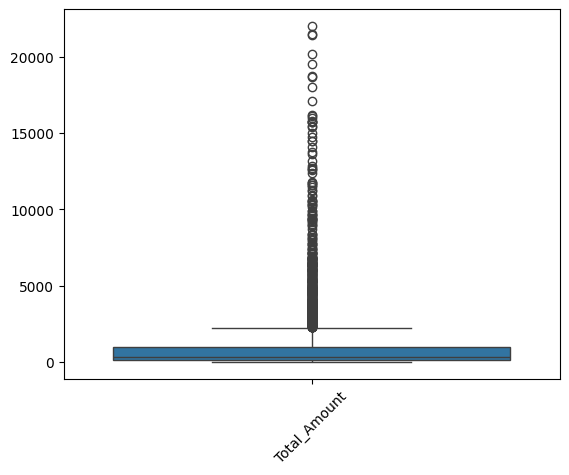

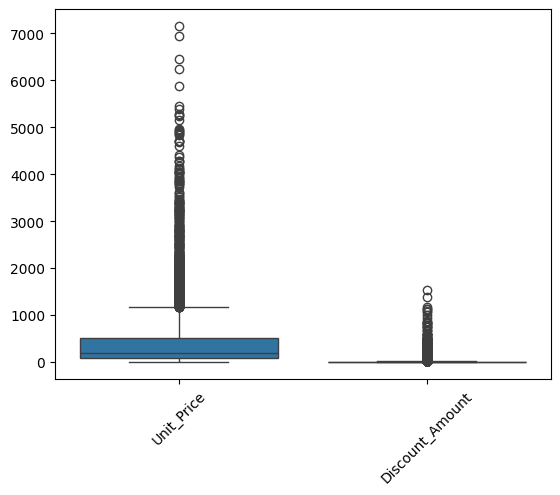

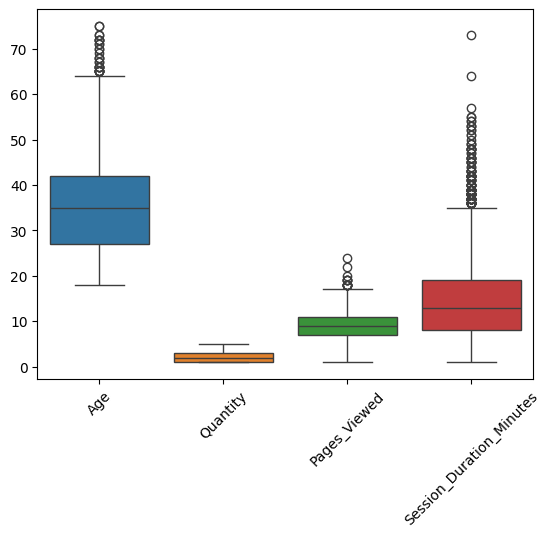

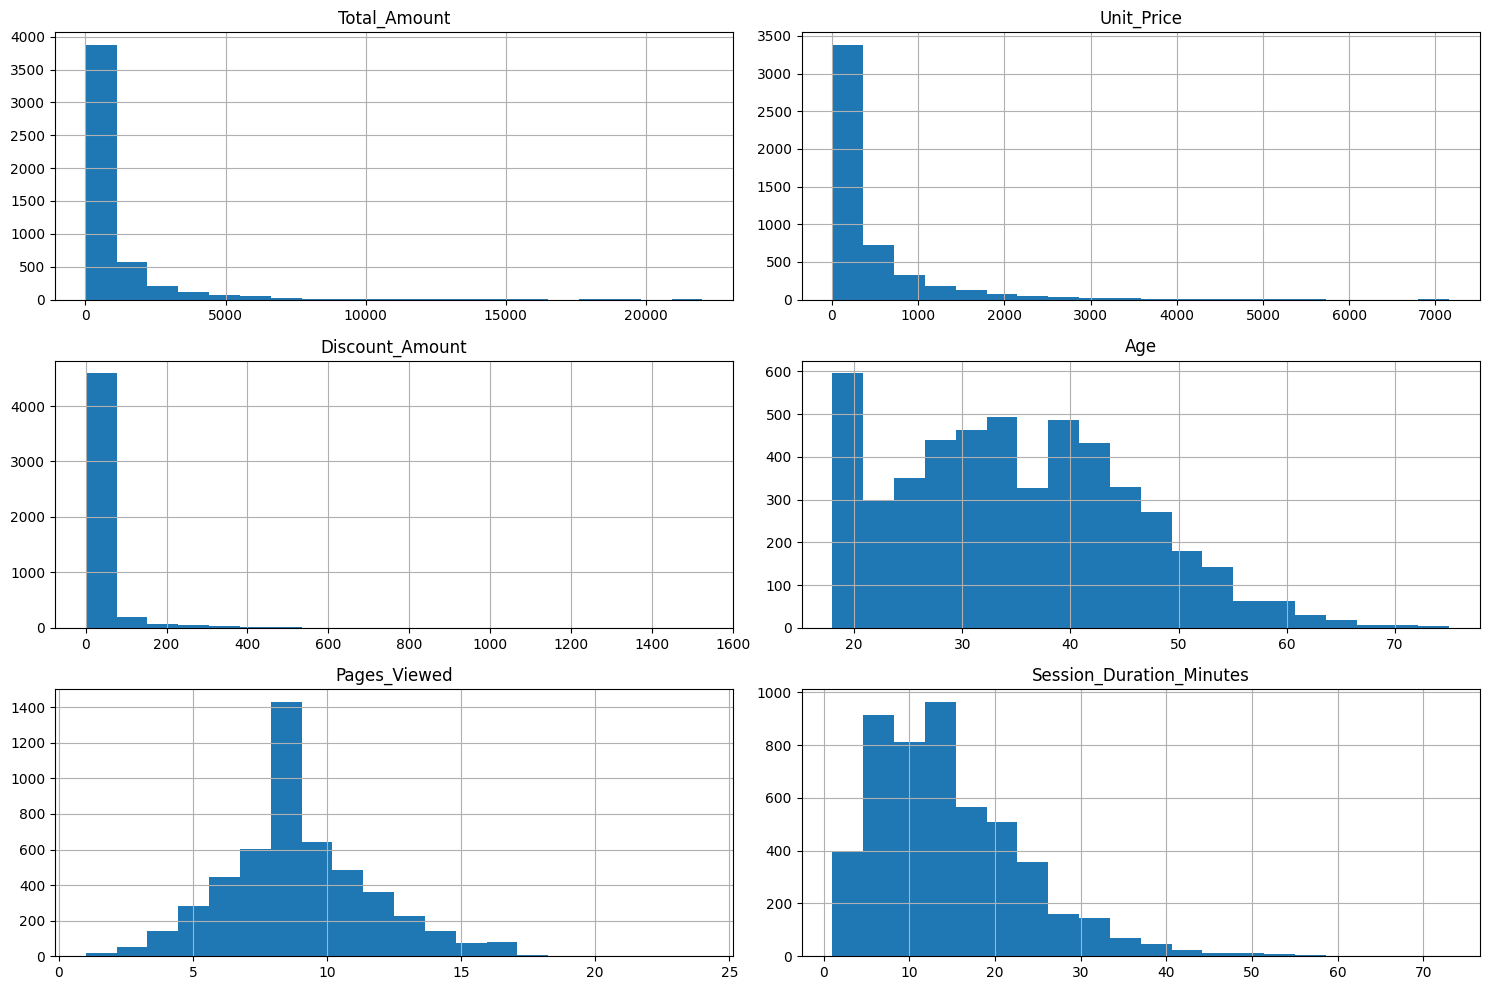

In [81]:
# Visualization to check for outliers and data errors
sns.boxplot(data=df[[ 'Total_Amount']])
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df[[ 'Unit_Price', 'Discount_Amount']])
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df[['Age', 'Quantity', 'Pages_Viewed', 'Session_Duration_Minutes']])
plt.xticks(rotation=45) 
plt.show()

# histogram for numerical columns
cols = ['Total_Amount', 'Unit_Price', 'Discount_Amount', 
        'Age', 'Pages_Viewed', 'Session_Duration_Minutes']
df[cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout() 
plt.show()



# First visualiasation overview of data 
By using some simple pairplots a quick overview of the data can be visualised. However the dataset shows to much overlap, and no distinct clusters are formed.
There are some hints that younger people buy larger quantites and when there is a discount one item or bought most often.
The device plots also contains to much overlap to make a clear destinction of any groups. 

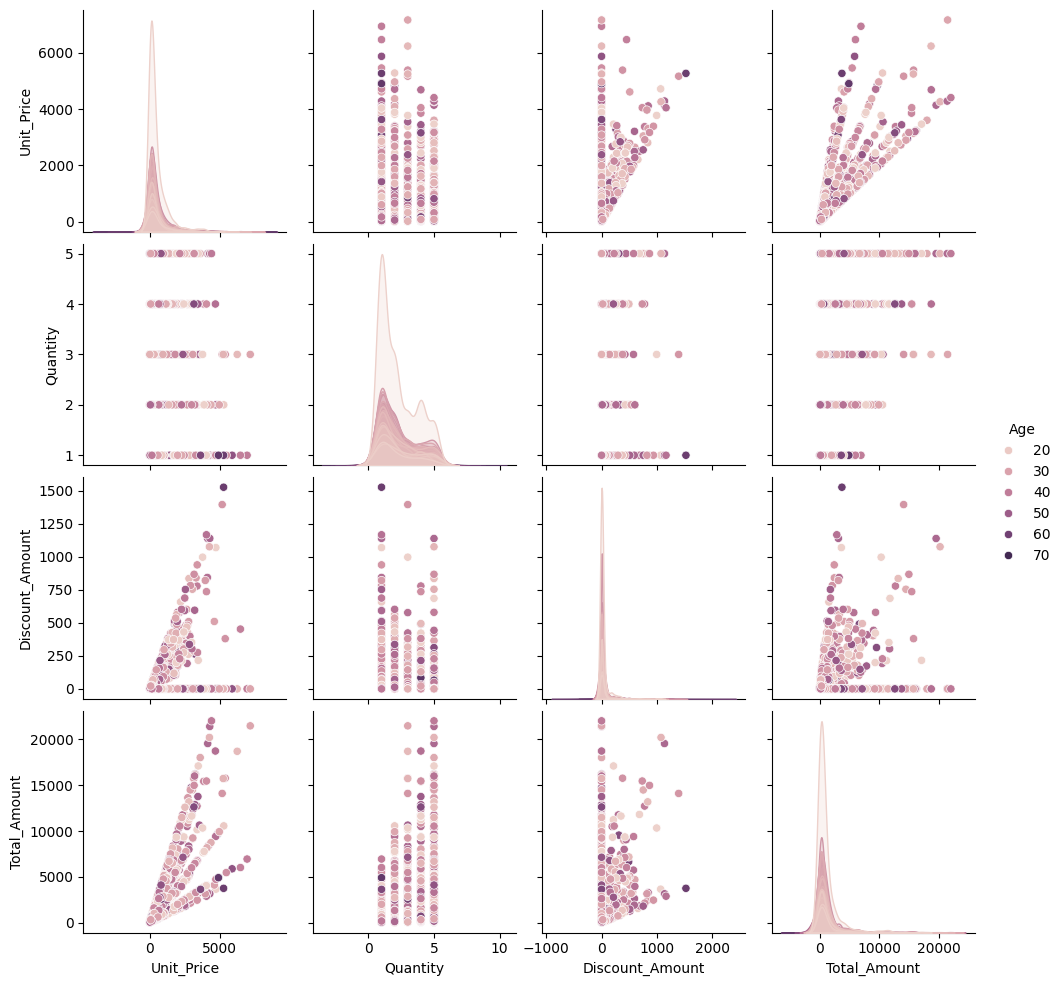

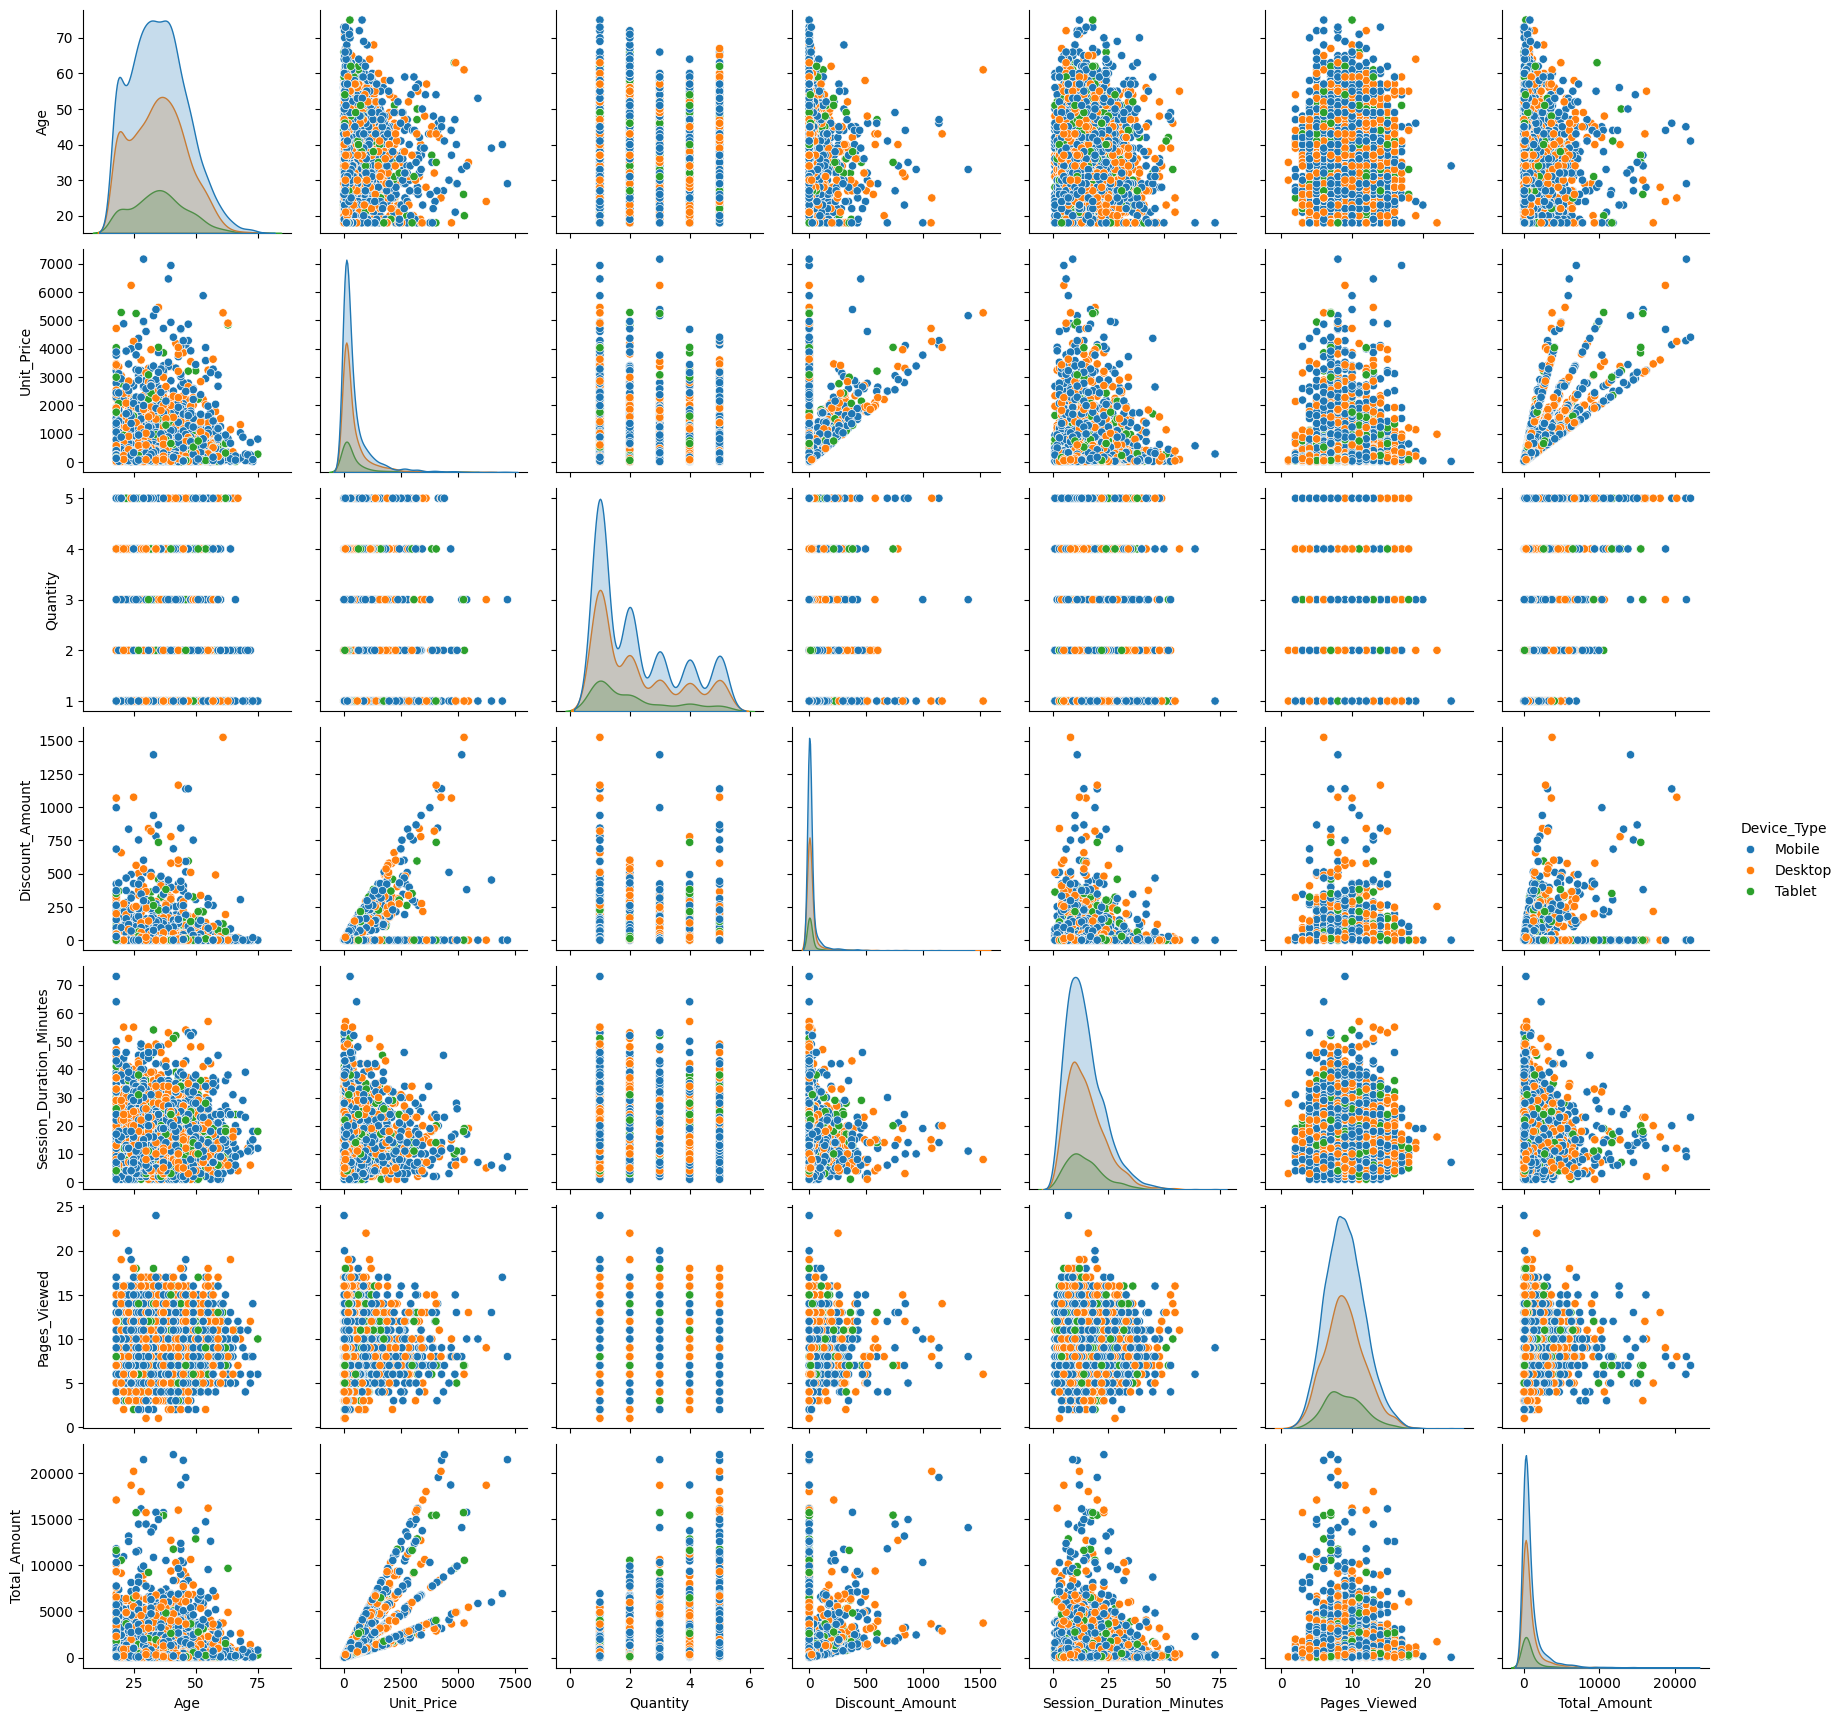

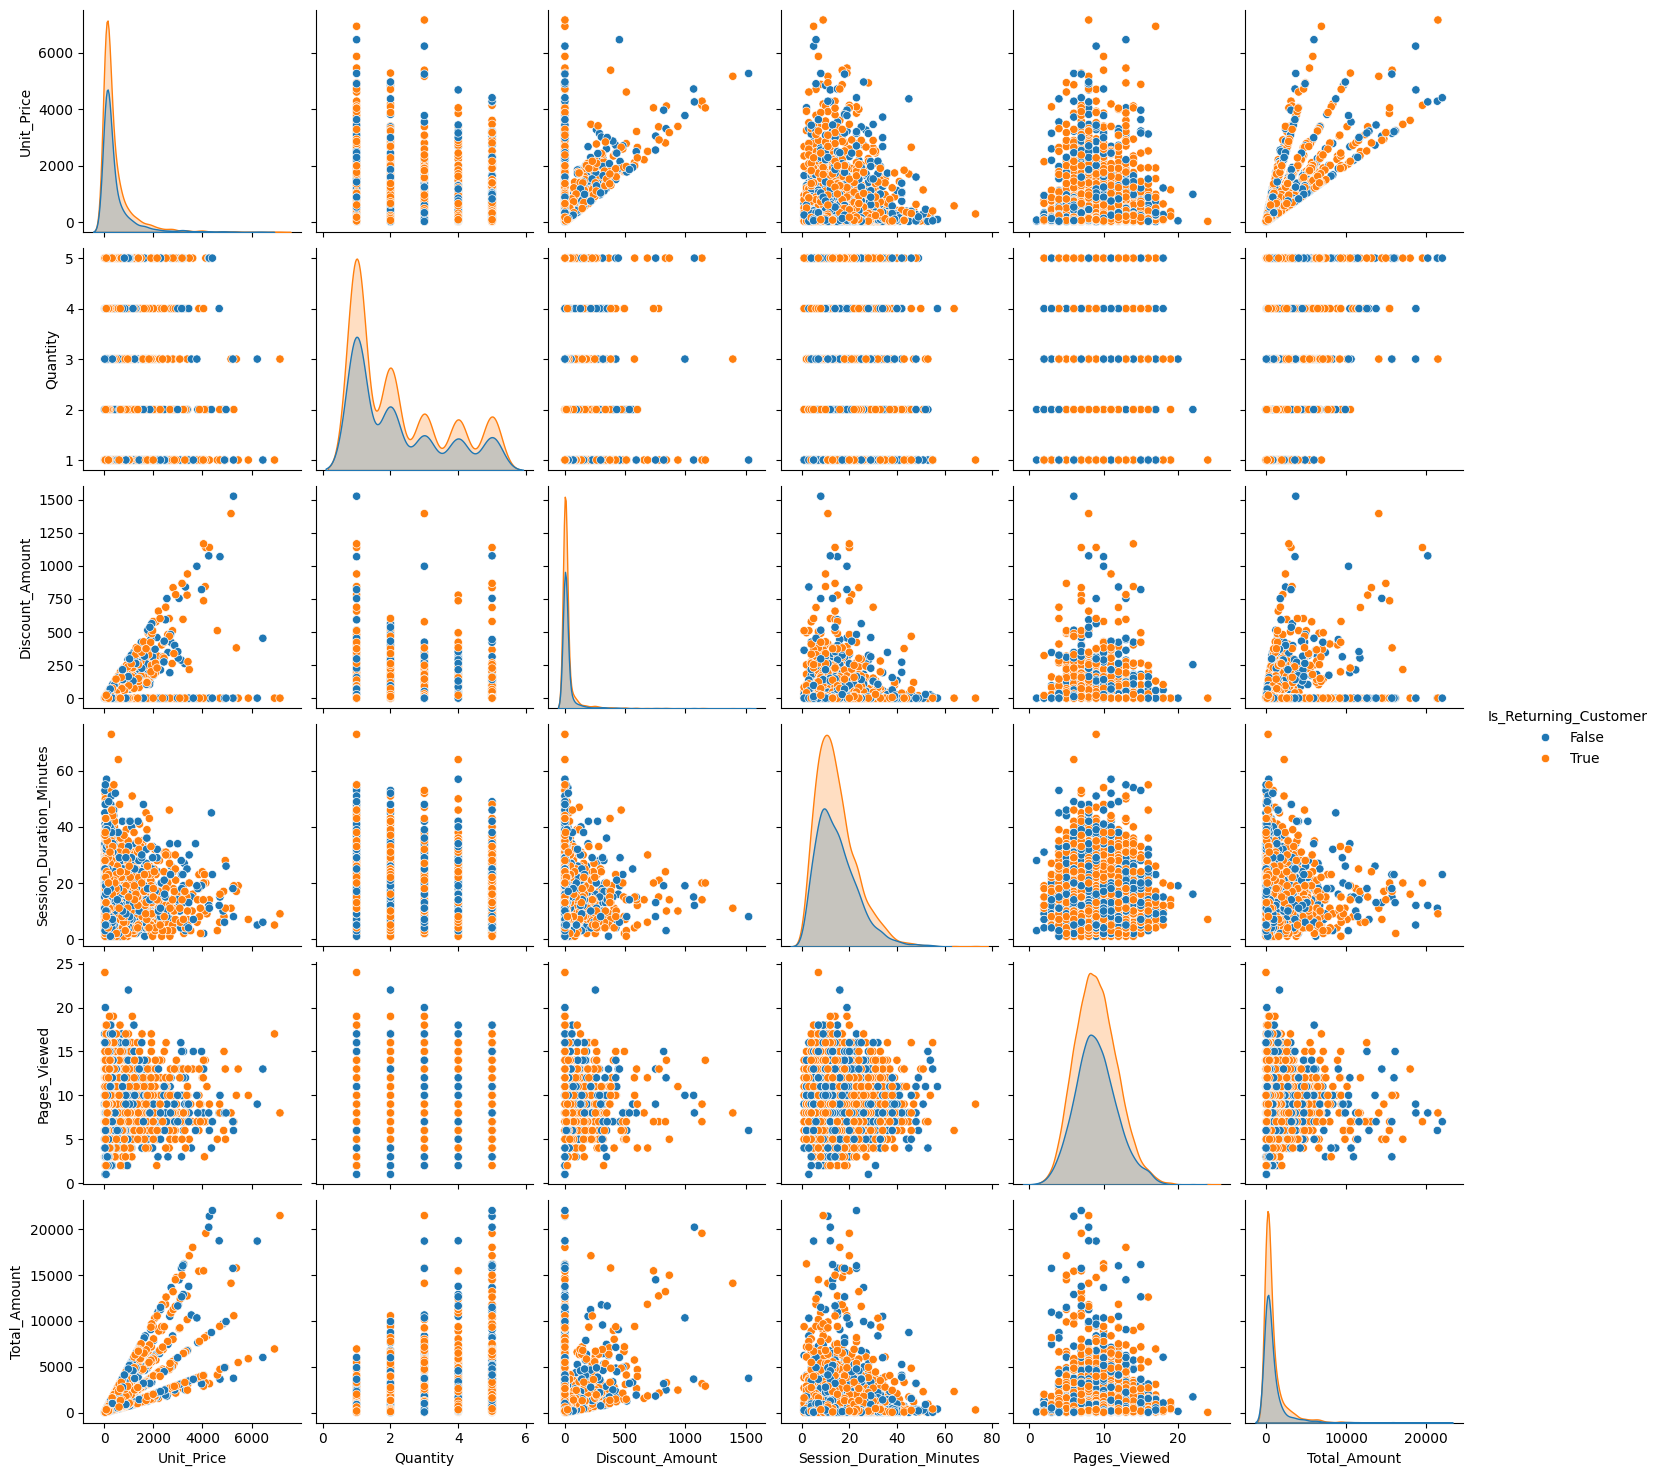

In [82]:

# Pairplot to see relationships between numerical variables and age and gender
sns.pairplot(df[['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount','Gender'] ],hue='Age')
plt.show()

sns.pairplot(df[['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Session_Duration_Minutes', 'Pages_Viewed', 'Total_Amount','Device_Type'] ],hue='Device_Type')   
plt.show()

sns.pairplot(df[['Is_Returning_Customer' ,'Unit_Price', 'Quantity', 'Discount_Amount','Session_Duration_Minutes', 'Pages_Viewed', 'Total_Amount'] ],hue='Is_Returning_Customer')   
plt.show()



# Correlaction
Heatmap shows strongest correlaction with *unit price*, then discount amount and quantity. The *Age* doesn't seem to correlate with anything. however *Session_Duration_Minutes* and *Pages_Viewed* doesnt seem to correlate which is odd.     

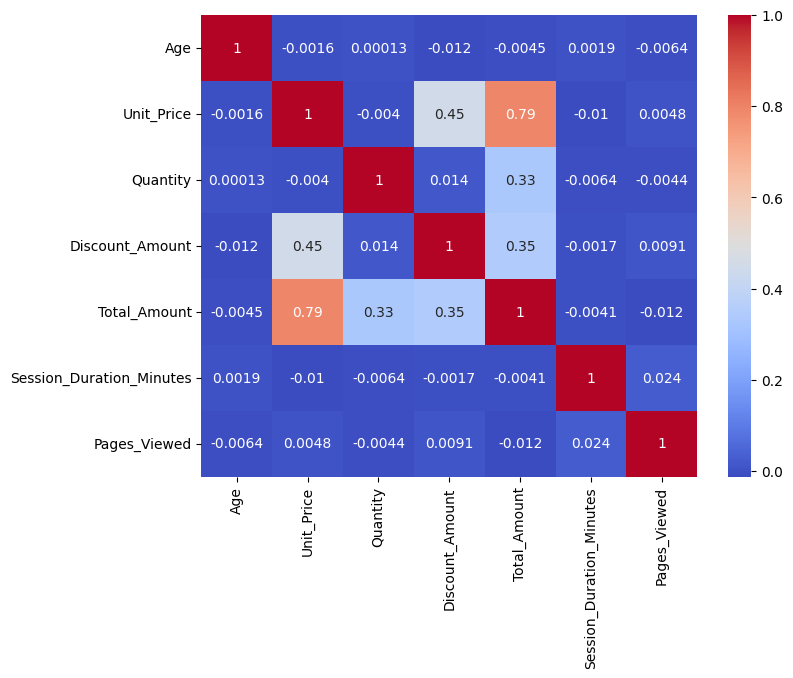

In [83]:

plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Unit_Price','Quantity','Discount_Amount','Total_Amount','Session_Duration_Minutes','Pages_Viewed']].corr(), annot=True, cmap='coolwarm')
plt.show()


## Boxplot
The boxplot shows a that the outlier transactions begins around *2000* for the *Genders*, and are quite similar.
The *City* Q1-Q3 displays som difference where some *City* *Total_Amount* is greater then others.
The *product category* that accounts for the most total value are *Electronics* followed by *Home & Garden*.
The device type shows that tablets transactions *total amount* is the smallest. 

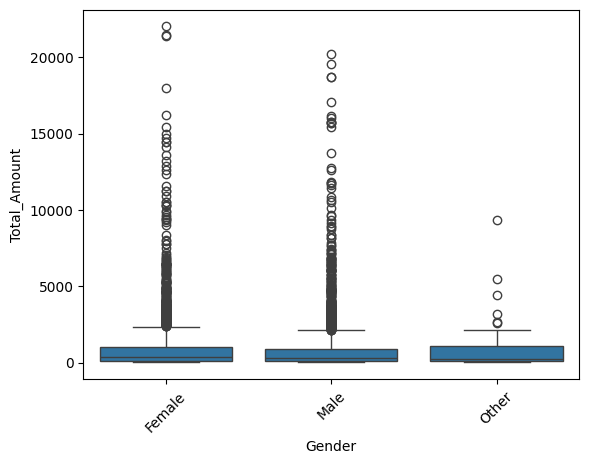

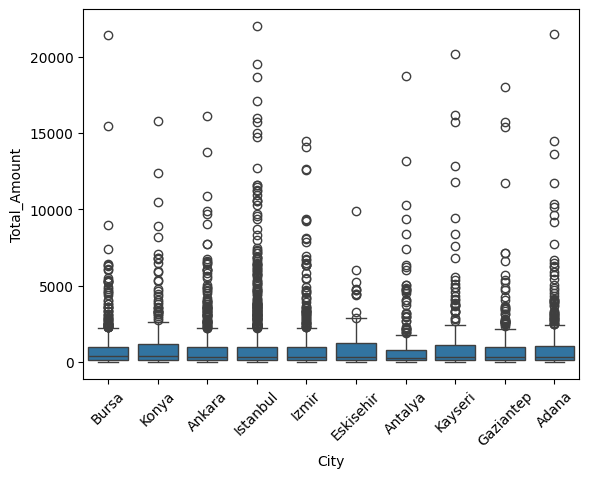

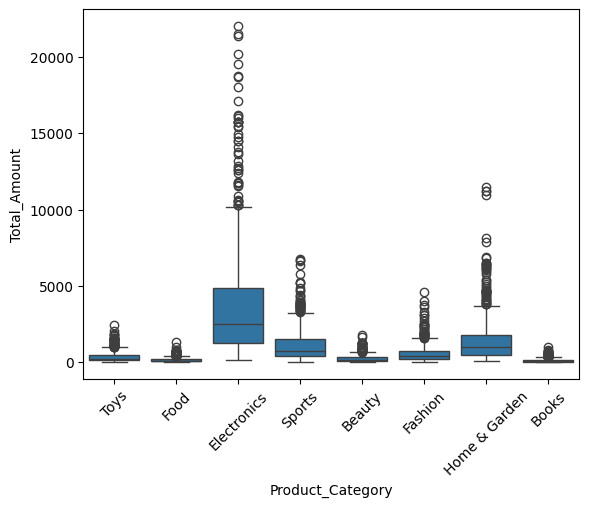

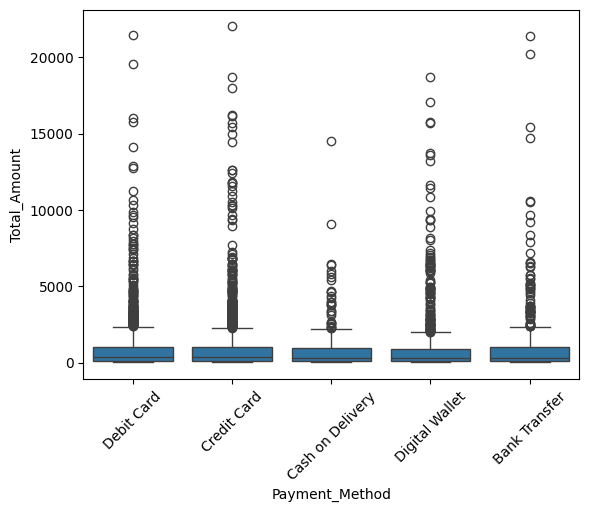

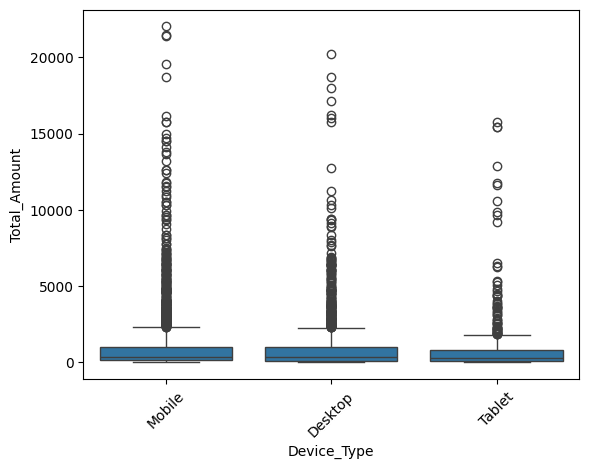

In [98]:
sns.boxplot(data=df, x='Gender', y='Total_Amount')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='City', y='Total_Amount')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Product_Category', y='Total_Amount')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Payment_Method', y='Total_Amount')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Device_Type', y='Total_Amount')
plt.xticks(rotation=45)
plt.show()


## Crosstabs gender
A *crosstab* method shows that the *Genders* transactions are similar. 

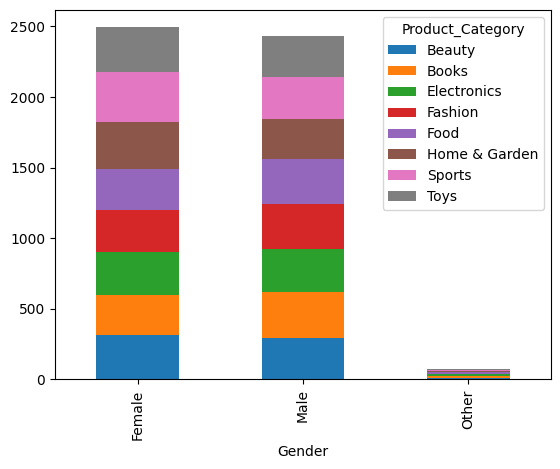

In [85]:
pd.crosstab(df['Gender'], df['Product_Category']).plot(kind='bar', stacked=True)
plt.show()

## Crosstab City
A Crosstab between *city* and *Product_Category*, and *normalize* by *index*. We can se how many of the diffrent *Product_Categories* the diffrent citys purchased .
And by normalizing on the columns we get the e-commerce stores perspective where the goods are heading.

In [86]:
# Crosstab to see the distribution of product categories across different cities
ct = pd.crosstab(df['City'], df['Product_Category'], normalize='index') * 100
ct.round(1)

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
City,,,,,,,,
Adana,12.7,14.6,15.6,9.5,7.9,13.0,15.3,11.4
Ankara,11.7,10.7,12.7,12.0,13.7,11.2,14.6,13.5
Antalya,14.4,13.1,11.2,9.9,13.6,12.0,13.6,12.0
Bursa,13.1,11.9,11.3,14.1,12.1,15.7,9.7,12.1
Eskisehir,12.9,13.8,11.4,11.0,13.8,13.8,14.8,8.6
Gaziantep,8.6,15.2,12.3,16.0,14.6,10.6,12.3,10.3
Istanbul,13.1,13.2,12.0,13.7,11.6,11.7,12.5,12.2
Izmir,12.8,10.7,11.8,12.8,12.7,11.8,14.7,12.7
Kayseri,12.8,11.7,16.3,9.7,10.9,12.5,13.2,12.8


In [87]:
# Crosstab to see the distribution where the product categories are bought
ct = pd.crosstab(df['City'], df['Product_Category'], normalize='columns') * 100
ct.round(1)

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
City,,,,,,,,
Adana,7.7,8.9,9.5,5.8,4.8,7.9,8.7,7.0
Ankara,13.8,12.8,14.9,14.1,16.3,13.2,16.0,16.2
Antalya,8.7,8.0,6.7,5.9,8.2,7.2,7.6,7.4
Bursa,10.5,9.6,9.0,11.3,9.7,12.6,7.2,9.8
Eskisehir,4.3,4.7,3.8,3.7,4.7,4.7,4.6,3.0
Gaziantep,4.8,8.6,6.9,9.0,8.2,6.0,6.4,5.9
Istanbul,27.1,27.4,24.7,28.3,24.1,24.2,24.1,25.7
Izmir,12.4,10.4,11.4,12.4,12.3,11.4,13.2,12.5
Kayseri,5.3,4.9,6.7,4.0,4.5,5.2,5.1,5.4


## Crosstab how transactions are performed



In [88]:
# what customers use to pay for different product categories
ct =pd.crosstab(df['Device_Type'], df['Product_Category'],normalize='index') * 100
ct.round(1)

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
Device_Type,,,,,,,,
Desktop,12.3,12.3,12.1,13.4,12.4,12.2,12.6,12.7
Mobile,12.6,11.9,12.6,12.3,12.2,12.7,14.0,11.7
Tablet,11.7,14.8,13.4,9.9,13.2,11.5,12.3,13.2


In [89]:
# how payment methods are distributed across product categories
ct = pd.crosstab(df['Payment_Method'], df['Product_Category'], normalize='index') * 100
ct.round(1)

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
Payment_Method,,,,,,,,
Bank Transfer,12.4,13.5,13.9,13.9,13.7,11.8,11.0,9.8
Cash on Delivery,14.9,11.7,12.5,12.5,12.5,11.7,10.9,13.3
Credit Card,12.4,10.6,12.5,13.1,12.7,12.8,14.1,11.8
Debit Card,12.3,13.6,12.7,11.0,10.8,12.0,14.5,13.2
Digital Wallet,12.0,13.8,11.4,12.2,13.1,12.6,12.2,12.6


# Groupby
Using *groupby* to investigate which city transactions amount to the greatest *Total_Value*.
Kayseris average total transaction amount is around 1200 meanwhile antalya is around 800.

The same method is used for *Product_Category* and *Device_Type* aswell for a better visual then the boxplot.

<Axes: xlabel='Total_Amount', ylabel='City'>

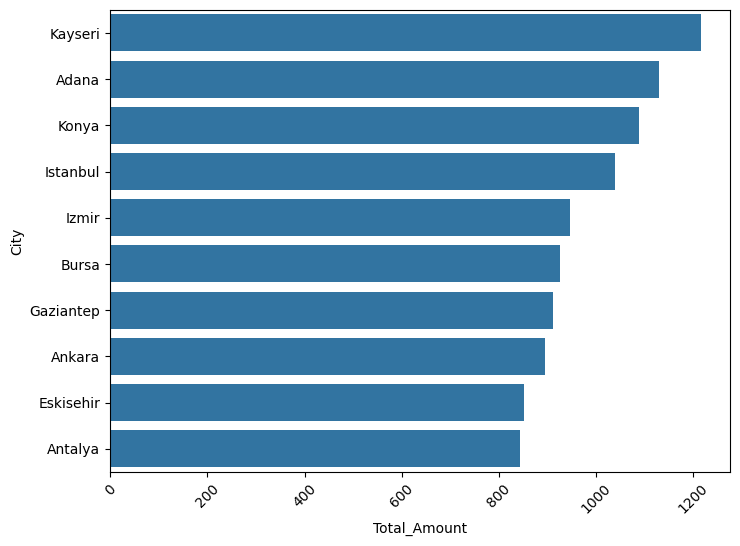

In [99]:
order = df.groupby('City')['Total_Amount'].mean().sort_values(ascending=False).index

plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(data=df, x='Total_Amount', y='City',orient='h', errorbar=None,order=order)

<Axes: xlabel='Total_Amount', ylabel='Product_Category'>

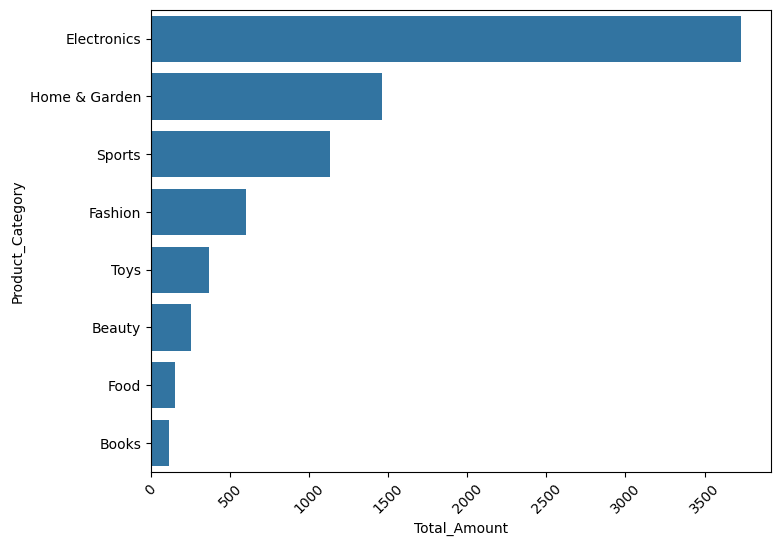

In [100]:
order = df.groupby('Product_Category')['Total_Amount'].mean().sort_values(ascending=False).index

plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(data=df, x='Total_Amount', y='Product_Category',orient='h', errorbar=None,order=order)

<Axes: xlabel='Total_Amount', ylabel='Device_Type'>

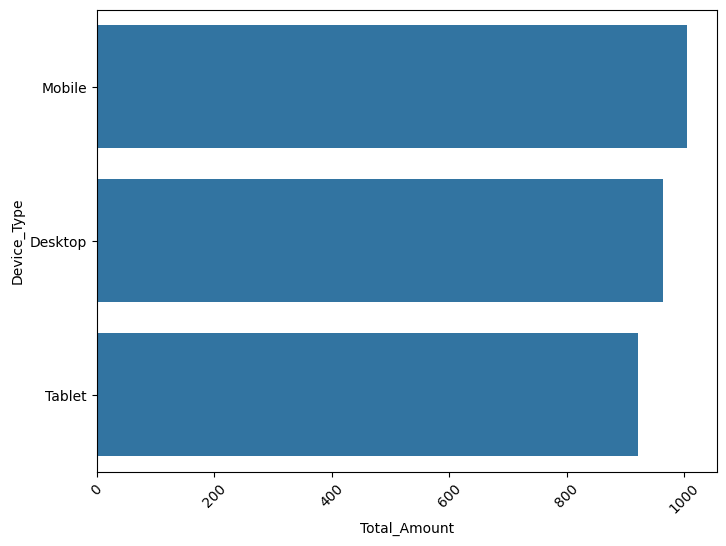

In [101]:
order = df.groupby('Device_Type')['Total_Amount'].mean().sort_values(ascending=False).index

plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(data=df, x='Total_Amount', y='Device_Type',orient='h', errorbar=None,order=order)

## Barplot
The *Session_Duration_Minutes* or the amount of *Pages_Viewed* doesn't seem to effect to *Total_Value*

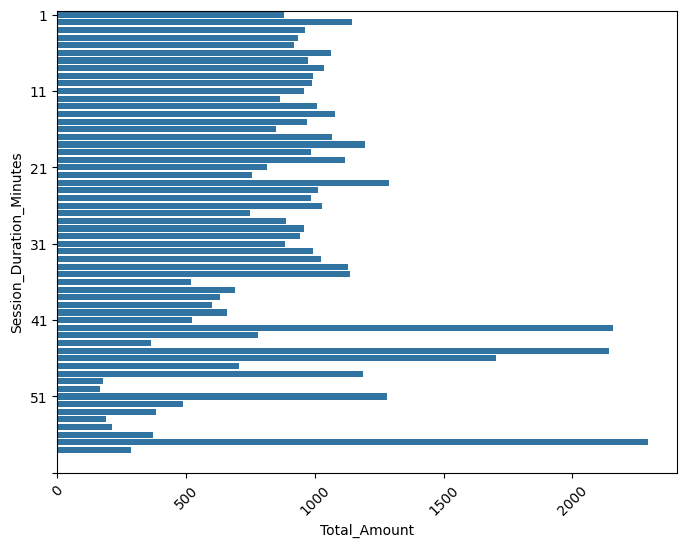

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Total_Amount', y='Session_Duration_Minutes',orient='h', errorbar=None)
plt.yticks(range(0,70,10))
plt.xticks(rotation=45)
plt.show()

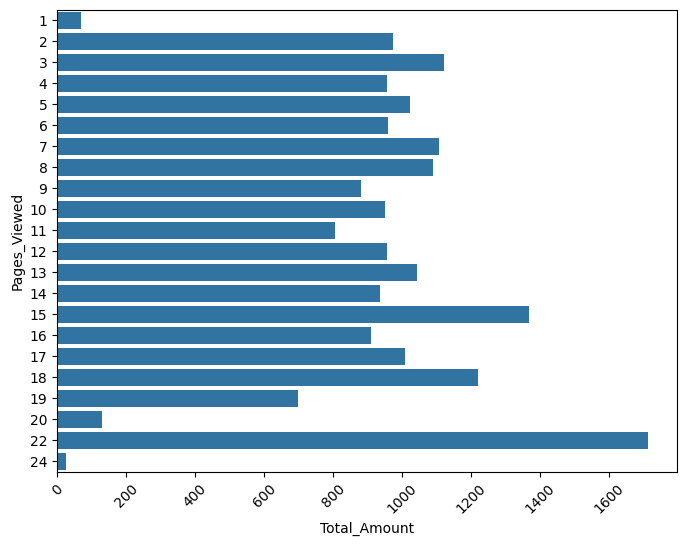

In [103]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Total_Amount', y='Pages_Viewed',orient='h', errorbar=None)
plt.xticks(rotation=45)
plt.show()